### <center>Multi class classification using ANN - fetal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./fetal_health.csv')
data.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.shape

(2126, 22)

In [5]:
data.isnull().mean()*100

baseline value                                            0.0
accelerations                                             0.0
fetal_movement                                            0.0
uterine_contractions                                      0.0
light_decelerations                                       0.0
severe_decelerations                                      0.0
prolongued_decelerations                                  0.0
abnormal_short_term_variability                           0.0
mean_value_of_short_term_variability                      0.0
percentage_of_time_with_abnormal_long_term_variability    0.0
mean_value_of_long_term_variability                       0.0
histogram_width                                           0.0
histogram_min                                             0.0
histogram_max                                             0.0
histogram_number_of_peaks                                 0.0
histogram_number_of_zeroes                                0.0
histogra

In [6]:
data.duplicated().sum()

13

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [9]:
dummy_y = to_categorical(y)

In [10]:
dummy_y

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,dummy_y,test_size=0.2,random_state=42,shuffle=True)

In [12]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim = x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 5828 (22.77 KB)
Trainable params: 5828 (22.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [14]:
es = EarlyStopping(monitor= 'val_loss',mode= 'min',patience=50,restore_best_weights= True)

In [15]:
history = model.fit(x_train,y_train,callbacks=[es],epochs=5000,batch_size = 15,validation_data= (x_test,y_test))

Epoch 1/5000
113/113 [==============================] - 1s 3ms/step - loss: 7.1942 - accuracy: 0.6367 - val_loss: 0.8653 - val_accuracy: 0.8392
Epoch 2/5000
113/113 [==============================] - 0s 2ms/step - loss: 1.6812 - accuracy: 0.7160 - val_loss: 0.4522 - val_accuracy: 0.8652
Epoch 3/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.9305 - accuracy: 0.7686 - val_loss: 0.3788 - val_accuracy: 0.8558
Epoch 4/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.7633 - accuracy: 0.7580 - val_loss: 0.4034 - val_accuracy: 0.8747
Epoch 5/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7864 - val_loss: 0.3590 - val_accuracy: 0.8605
Epoch 6/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7994 - val_loss: 0.3511 - val_accuracy: 0.8534
Epoch 7/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.8053 - val_loss: 0.3779 - val_accuracy:

113/113 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8503 - val_loss: 0.2577 - val_accuracy: 0.8865
Epoch 58/5000
113/113 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8657 - val_loss: 0.2793 - val_accuracy: 0.8865
Epoch 59/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8734 - val_loss: 0.2866 - val_accuracy: 0.8960
Epoch 60/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8538 - val_loss: 0.2704 - val_accuracy: 0.9102
Epoch 61/5000
113/113 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8609 - val_loss: 0.2943 - val_accuracy: 0.8936
Epoch 62/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8592 - val_loss: 0.2636 - val_accuracy: 0.9007
Epoch 63/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8544 - val_loss: 0.2934 - val_accuracy: 0.8936

113/113 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8698 - val_loss: 0.2830 - val_accuracy: 0.9078
Epoch 114/5000
113/113 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8657 - val_loss: 0.2449 - val_accuracy: 0.9054
Epoch 115/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8751 - val_loss: 0.2401 - val_accuracy: 0.9125
Epoch 116/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8781 - val_loss: 0.2304 - val_accuracy: 0.9243
Epoch 117/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8734 - val_loss: 0.2302 - val_accuracy: 0.9220
Epoch 118/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8763 - val_loss: 0.2365 - val_accuracy: 0.9125
Epoch 119/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8722 - val_loss: 0.2606 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8911 - val_loss: 0.2349 - val_accuracy: 0.9078
Epoch 170/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.8905 - val_loss: 0.2503 - val_accuracy: 0.9102
Epoch 171/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.8840 - val_loss: 0.2414 - val_accuracy: 0.9054
Epoch 172/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8811 - val_loss: 0.2360 - val_accuracy: 0.9196
Epoch 173/5000
113/113 [==============================] - 0s 1ms/step - loss: 0.2924 - accuracy: 0.8870 - val_loss: 0.2267 - val_accuracy: 0.9220
Epoch 174/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8905 - val_loss: 0.2373 - val_accuracy: 0.9102
Epoch 175/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8840 - val_loss: 0.2228 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.8876 - val_loss: 0.2305 - val_accuracy: 0.9031
Epoch 226/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.8988 - val_loss: 0.2219 - val_accuracy: 0.9054
Epoch 227/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8923 - val_loss: 0.2210 - val_accuracy: 0.9291
Epoch 228/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8840 - val_loss: 0.2219 - val_accuracy: 0.9338
Epoch 229/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.8888 - val_loss: 0.2176 - val_accuracy: 0.9362
Epoch 230/5000
113/113 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.8840 - val_loss: 0.2453 - val_accuracy: 0.8960
Epoch 231/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.8964 - val_loss: 0.2449 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.8976 - val_loss: 0.2472 - val_accuracy: 0.9291
Epoch 282/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8911 - val_loss: 0.2200 - val_accuracy: 0.9243
Epoch 283/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.9012 - val_loss: 0.2267 - val_accuracy: 0.9291
Epoch 284/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8970 - val_loss: 0.2160 - val_accuracy: 0.9173
Epoch 285/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.8923 - val_loss: 0.2269 - val_accuracy: 0.9267
Epoch 286/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8959 - val_loss: 0.2155 - val_accuracy: 0.9220
Epoch 287/5000
113/113 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.8781 - val_loss: 0.2483 - val_accuracy: 

In [16]:
history_dict = history.history

In [17]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [18]:
epochs = range(1,len(acc)+1)

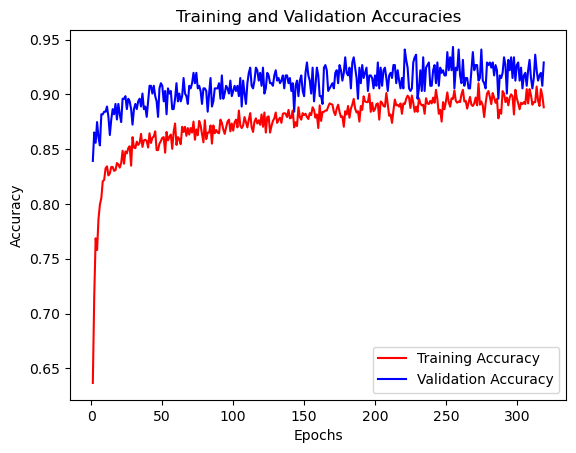

In [19]:
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
pred= model.predict(x)

67/67 [==============================] - 0s 811us/step


In [21]:
matrix = confusion_matrix(dummy_y.argmax(axis = 1),pred.argmax(axis = 1))

In [22]:
matrix

array([[1617,   26,    3],
       [  93,  199,    0],
       [  20,   15,  140]], dtype=int64)

In [23]:
print(classification_report(dummy_y.argmax(axis = 1),pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           1       0.93      0.98      0.96      1646
           2       0.83      0.68      0.75       292
           3       0.98      0.80      0.88       175

    accuracy                           0.93      2113
   macro avg       0.91      0.82      0.86      2113
weighted avg       0.92      0.93      0.92      2113



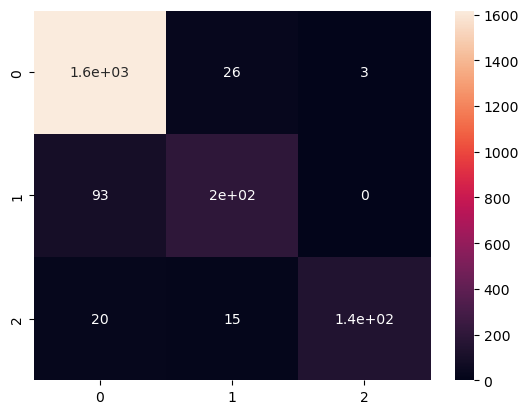

In [24]:
sns.heatmap(matrix,annot=True);